<a href="https://colab.research.google.com/github/william-ma70/william-ma70.github.io/blob/main/Spearman_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive/')
from scipy import stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

Mounted at /content/drive/


In [4]:
os.makedirs('/content/drive/MyDrive/Psych_Research/', exist_ok = True)
os.makedirs('/content/drive/MyDrive/Psych_Research/data/', exist_ok = True)
os.makedirs('/content/drive/MyDrive/Psych_Research/data/input/', exist_ok = True)
os.makedirs('/content/drive/MyDrive/Psych_Research/data/output/', exist_ok = True)


In [5]:
input_dir = '/content/drive/MyDrive/Psych_Research/data/input/'
output_dir = '/content/drive/MyDrive/Psych_Research/data/output/'

In [43]:
# Create a dataframe for suicide rates and each variable 
df = pd.read_csv(input_dir+'suicide-death-rates.csv')
df_drug = pd.read_csv(input_dir+'share-with-alcohol-or-drug-use-disorders.csv')
df_poverty = pd.read_csv(input_dir+'share-of-population-in-extreme-poverty.csv')
df_pollution = pd.read_csv(input_dir+'share-deaths-air-pollution.csv')
df_hunger = pd.read_csv(input_dir+'prevalence-of-undernourishment.csv')
df_literacy = pd.read_csv(input_dir+'primary-completion-rate.csv')
df_rights = pd.read_csv(input_dir+'human-rights-protection.csv')
df_gdp = pd.read_csv(input_dir+'gdp-per-capita-in-us-dollar-world-bank.csv')

df_list = [df, df_drug, df_poverty, df_pollution, df_hunger, df_literacy, df_rights, df_gdp]
df_merged = df

for i in range(len(df_list)):
    df_list[i] = df_list[i][df_list[i].Year==2012].dropna(axis=0)

# df_list[0] = df_list[0][df_list[0].Year==2012].drop(columns='Entity')
# df_merged = df_merged.merge(df_list[0], on=['Code', 'Year'], how='inner')
# df_list[1] = df_list[1][df_list[1].Year==2012].drop(columns='Entity')
# df_merged = df_merged.merge(df_list[1], on=['Code', 'Year'], how='inner')
# df_list[2] = df_list[2][df_list[2].Year==2012].drop(columns='Entity')
# df_merged = df_merged.merge(df_list[2], on=['Code', 'Year'], how='inner')
# df_list[3] = df_list[3][df_list[3].Year==2012].drop(columns='Entity')
# df_merged = df_merged.merge(df_list[3], on=['Code', 'Year'], how='inner')
# df_list[4] = df_list[4][df_list[4].Year==2012].drop(columns='Entity')
# df_merged = df_merged.merge(df_list[4], on=['Code', 'Year'], how='inner')
# df_list[5] = df_list[5][df_list[5].Year==2012].drop(columns='Entity')
# df_merged = df_merged.merge(df_list[5], on=['Code', 'Year'], how='inner')
# df_list[6] = df_list[6][df_list[6].Year==2012].drop(columns='Entity')
# df_merged = df_merged.merge(df_list[6], on=['Code', 'Year'], how='inner')

# print(df_merged)
# df_merged.columns
# df_merged = df_merged.dropna(axis='rows')
# print(df_merged)


# for i in range(len(df_list)):
#     df_list[i] = df_list[i][df_list[i].Year==2012].drop(columns='Entity')
#     df_merged = df_merged.merge(df_list[i], on=['Code', 'Year'], how='inner')
df = df[df.Year==2018].dropna(axis=0)
df_drug = df_drug[df_drug.Year==2018].dropna(axis=0)
df_poverty = df_poverty[df_poverty.Year==2012].dropna(axis=0)
df_pollution = df_pollution[df_pollution.Year==2012].dropna(axis=0)
df_hunger = df_hunger[df_hunger.Year==2012].dropna(axis=0)
df_literacy = df_literacy[df_literacy.Year==2012].dropna(axis=0)
df_rights = df_rights[df_rights.Year==2012].dropna(axis=0)
df_gdp = df_gdp[df_gdp.Year==2012].dropna(axis=0)
print(df)
print(df_drug)

              Entity      Code  Year  \
28       Afghanistan       AFG  2018   
148          Albania       ALB  2018   
178          Algeria       DZA  2018   
238   American Samoa       ASM  2018   
298          Andorra       AND  2018   
...              ...       ...   ...   
7648         Vietnam       VNM  2018   
7798           World  OWID_WRL  2018   
7948           Yemen       YEM  2018   
7978          Zambia       ZMB  2018   
8008        Zimbabwe       ZWE  2018   

      Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)  
28                                             6.217334              
148                                            4.976800              
178                                            3.589646              
238                                            7.405425              
298                                            7.185147              
...                                                 ...              
7648                         

In [27]:
df = pd.read_csv(input_dir+'Suicide_Research_Data_Compiled.csv')
df = df.drop(columns = 'Unnamed: 0')
df = df.dropna(axis=0)
# df = df.Year==2012
print(df)

     Code    Year  \
0     AFG  1990.0   
1     AFG  1991.0   
2     AFG  1992.0   
3     AFG  1993.0   
4     AFG  1994.0   
...   ...     ...   
3608  ITA  1998.0   
3609  ITA  1999.0   
3610  ITA  2000.0   
3611  ITA  2001.0   
3612  ITA  2002.0   

      Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)  \
0                                              8.277699               
1                                              8.174310               
2                                              8.139174               
3                                              8.231295               
4                                              8.362751               
...                                                 ...               
3608                                           6.874245               
3609                                           6.675306               
3610                                           6.524798               
3611                                 

In [42]:
s = df["Deaths - Self-harm - Sex: Both - Age: Age-standardized (Rate)"]
s_drug = df_drug["Prevalence - Substance use disorders - Sex: Both - Age: Age-standardized (Percent)"]
s_poverty = df_poverty['$1.90 per day - share of population below poverty line']
s_pollution = df_pollution['Deaths - Cause: All causes - Risk: Air pollution - Sex: Both - Age: Age-standardized (Percent)']
s_hunger = df_hunger['Prevalence of undernourishment (% of population)']
s_literacy = df_literacy['Primary completion rate, total (% of relevant age group)']
s_rights = df_rights['Human rights protection']
s_gdp = df_gdp['GDP per capita (constant 2010 US$)']

print(stats.spearmanr(s, s_drug))
print(stats.spearmanr(s, s_poverty))
print(stats.spearmanr(s, s_pollution))
print(stats.spearmanr(s, s_hunger))
print(stats.spearmanr(s, s_literacy))
print(stats.spearmanr(s, s_rights))
print(stats.spearmanr(s, s_gdp))

SpearmanrResult(correlation=0.22060425401512723, pvalue=0.0014803426855449213)


ValueError: ignored

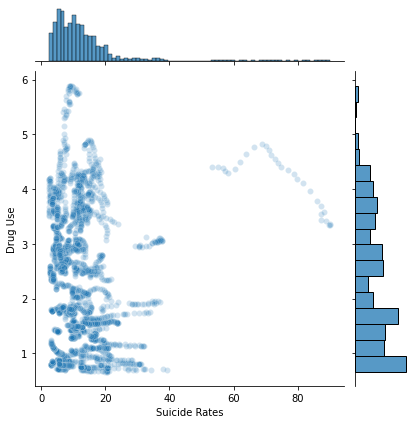

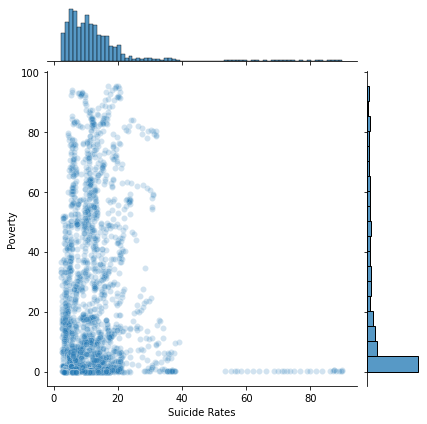

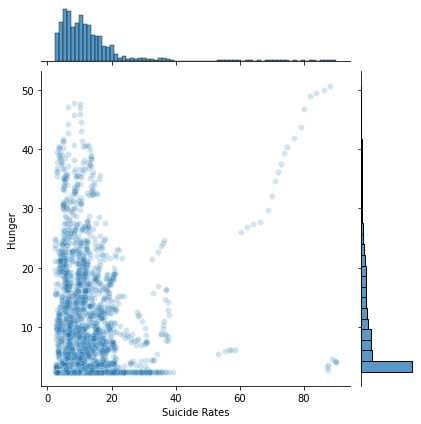

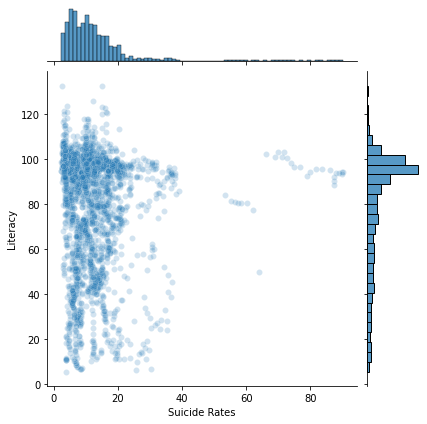

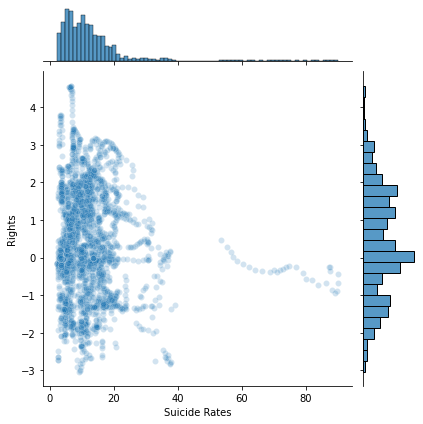

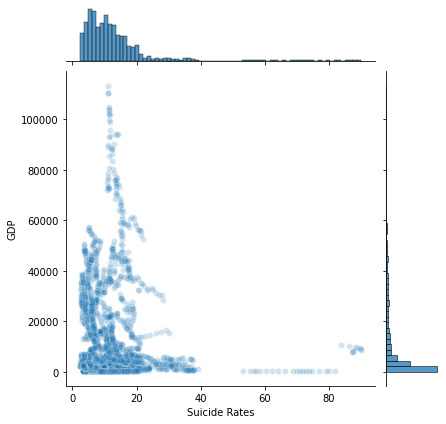

In [25]:
df_plot = pd.DataFrame({'Suicide Rates': s, 'Drug Use': s_drug})
corr = df_plot.corr(method = 'spearman')
sns.jointplot(x="Suicide Rates", y="Drug Use", data=df_plot, alpha=0.2)
plt.show()

df_plot = pd.DataFrame({'Suicide Rates': s, 'Poverty': s_poverty})
corr = df_plot.corr(method = 'spearman')
sns.jointplot(x="Suicide Rates", y="Poverty", data=df_plot, alpha=0.2)
plt.show()

df_plot = pd.DataFrame({'Suicide Rates': s, 'Hunger': s_hunger})
corr = df_plot.corr(method = 'spearman')
sns.jointplot(x="Suicide Rates", y="Hunger", data=df_plot, alpha=0.2)
plt.show()

df_plot = pd.DataFrame({'Suicide Rates': s, 'Literacy': s_literacy})
corr = df_plot.corr(method = 'spearman')
sns.jointplot(x="Suicide Rates", y="Literacy", data=df_plot, alpha=0.2)
plt.show()

df_plot = pd.DataFrame({'Suicide Rates': s, 'Rights': s_rights})
corr = df_plot.corr(method = 'spearman')
sns.jointplot(x="Suicide Rates", y="Rights", data=df_plot, alpha=0.2)
plt.show()

df_plot = pd.DataFrame({'Suicide Rates': s, 'GDP': s_gdp})
corr = df_plot.corr(method = 'spearman')
sns.jointplot(x="Suicide Rates", y="GDP", data=df_plot, alpha=0.2)
plt.show()

In [6]:
pd.read_csv('https://raw.githubusercontent.com/william-ma70/william-ma70.github.io/main/gdp-per-capita-in-us-dollar-world-bank.csv')

,Entity,Code,Year,GDP per capita (constant 2010 US$)
0,Afghanistan,AFG,2002,330.303494
1,Afghanistan,AFG,2003,343.080890
2,Afghanistan,AFG,2004,333.216617
3,Afghanistan,AFG,2005,357.234762
4,Afghanistan,AFG,2006,365.284371
...,...,...,...,...
12147,Zimbabwe,ZWE,2016,1224.314460
12148,Zimbabwe,ZWE,2017,1263.278346
12149,Zimbabwe,ZWE,2018,1289.146499
12150,Zimbabwe,ZWE,2019,1168.008072
